<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span></li><li><span><a href="#Построение-модели-прогнозирования-оттока-клиентов" data-toc-modified-id="Построение-модели-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение модели прогнозирования оттока клиентов</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация клиентов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Прогнозирование вероятности оттока клиентов для сети фитнес-центров

Сеть фитнес-центров разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространенная проблема фитнес-клубов и других сервисов - отток клиентов.

Индикаторы оттока зависят от специфики отрасли.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц он не разу не посетил спортзал.

**Цель данной работы** - провести анализ оттока и подготовить план действий по удержанию клиентов.

 -  *Данные представленые в `csv`-файлах содержат информацию на месяц до оттока и факт оттока на определенный месяц.*

**В ходе исследования постараемся решить следующие задачи:**

 - спрогнозтруем вероятность оттока (на уровне следующего месяца) для каждого клиента
 - сформируем типичные портреты клиентов: выделим несколько наиболее ярких групп и охарактеризуем их основные свойства
 - проанализируем основные признаки, наиболее сильно влияющие на отток
 - сформулируем основные выводы и разработаем рекомендации по повышению качества работы с клиентами:
   - 1)выделим целевые группы клиентов
   - 2)предложим меры по снижению оттока
   - 3)определим особенности взаимодействия с клиентами
   
Исследование пройдет по следующим этапам:

 - изучение данных, получение общей информации
 - исследовательский анализ даныых
 - построение модели прогнозирование оттока клиентов
 - кластеризация клиентов

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import math as mth

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

Прочитаем файл и сохраним

Получим общюю информацию

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
df.shape

(4000, 14)

In [4]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [6]:
# приведем названия колонок к нижнему регистру
df.columns = df.columns.str.lower()
print('Количество дубликатов: {}'.format(df.duplicated().sum()))

Количество дубликатов: 0


In [7]:
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [8]:
df.tail()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0


**Вывод**

 - привели названия столбцов к нижнему регистру
 - количество значений во всех столбцах одинаковое - пропусков нет
 - дубликатов в нет

## Исследовательский анализ данных (EDA)

 - Изучим есть ли отсутствующие признаки. Изучим средние значения и стандартные отклонения методом describe()

In [9]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Комментарий:

- мужчин и женщин в фитнес-клубе, примерно одинаковое количество
- клиентов, проживающих или работающих недалеко от фитнеса около 85%
- около половины клиентов являются сотрудниками партнерских организаций
- примерно 30% клиентов пришли по программе "приведи друга"
- контактный телефон клиента известен в 90% случаев
- средняя длительность текущего действующего абонента 4,6 месяцев
- гупповые занятия посещают около 40% клиентов
- средний возраст клиентов фитнес-клуба 29 лет
- средняя суммарная выручка от других услуг 146
- срок до окончания текущего действующего абонемента, примерно 4 месяца
- средний лайфтайм 3,7 месяцев, максимальный 31 месяц( два с половиной года)
- примерно 2 раза в неделю в среднем посещают фитнес-клуб. Хотя средняя частота за все время выше, чем за предудущий месяц(это может быть связано с сезонностью)
- **доля оттока 27%**

Стандартное отклонение близко к среднему значению или дополняет его в признаках, где ответов всего два - да или нет.
Для остальных признаков(за исключением возраста клиентов) стандартное отклонение значительное, что говорит о неоднородности данных.

 - Изучим средние значения признаков для тех, кто ушел в отток и кто остался, используем groupby()

In [10]:
df.groupby('churn').mean().T.round(2)

churn,0,1
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
month_to_end_contract,5.28,1.66


Комментарий:

Для средних значений признаков тех кто ушел в отток и кто остался характерны следующие черты:

 - распределение по полу  одинаковое в группах
 - клиенты, которые живут или работают рядом с фитнесом реже попадают в отток
 - сотрудники компаний партнеров реже перестают посещать занятия фитнесом, чем остальные клиенты
 - клиенты, пришедшие по акции "приведи друга" в 2 раза реже уходят в отток
 - наличие или отсутствие мобильного телефона клиента не связано с его оттоком
 - средняя длительность договора логично больше у оставшихся клиентов
 - оставшиеся клиенты почти в два раза чаще посещают групповые занятия
 - средний возраст в группах немного отличается, среди оставшихся больше старшего возраста
 - суммарная выручка от других услуг фитнес-центра для оставшихся клиентов немного выше
 - оставшееся время до окончания срока действия абонемента логично больше у оставшихся клиентов 
 - лайфтайм также будет больше у оставшихся клиентов
 - оставшиеся клиенты постоянны в регулярности своих занятий 2 раза в неделю. Средняя частота посещений в неделю для клиентов оттока 1,47 за все время - и всего 1 раз в неделю за предыдущий месяц

- Построим столбчатые гистограммы и распределения признаков для тех, кто ушел(отток) и тех, кто остался(не попали в отток)

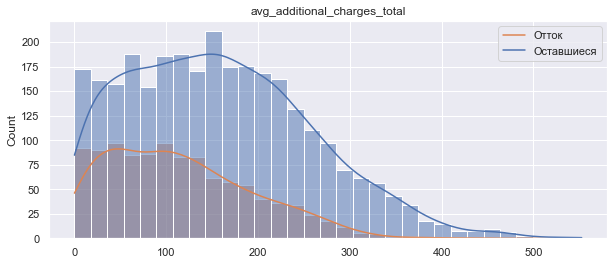

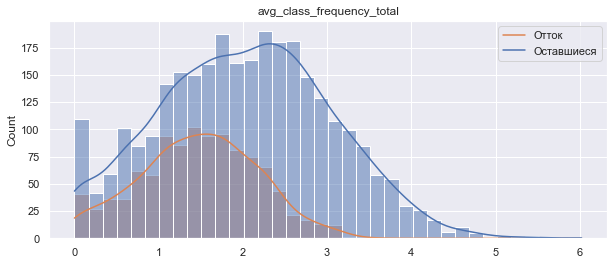

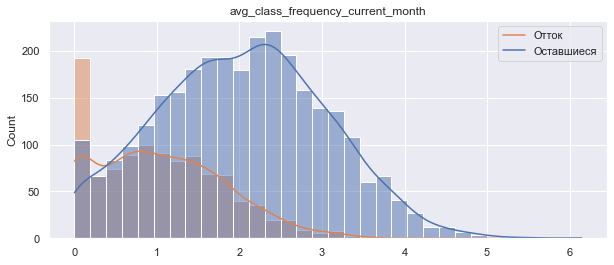

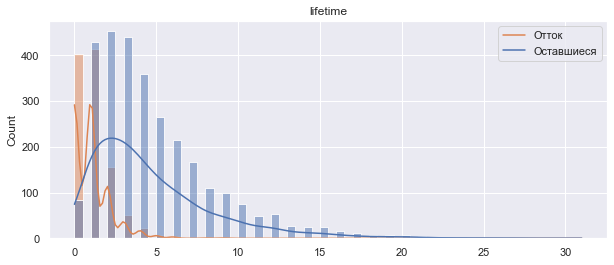

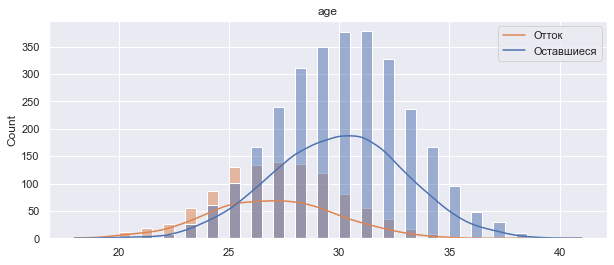

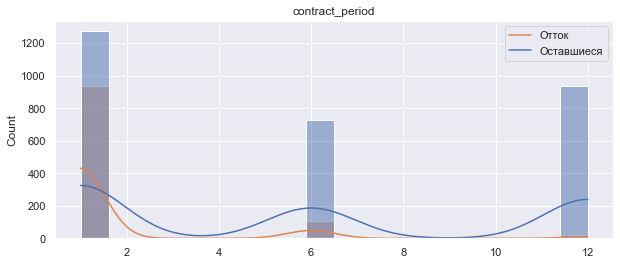

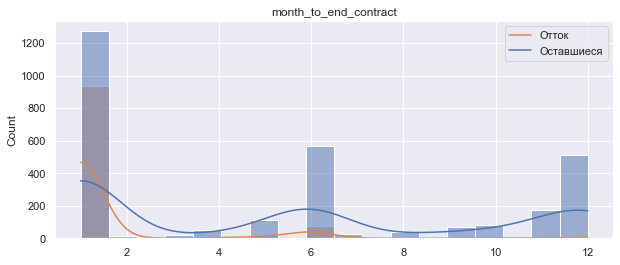

In [11]:
histplot_columns = ['avg_additional_charges_total', 'avg_class_frequency_total', 
                    'avg_class_frequency_current_month', 'lifetime', 'age', 
                    'contract_period', 'month_to_end_contract']

for column in histplot_columns: 
    plt.figure(figsize=(10,4))
    sns.histplot(data = df, x = df[column], hue = 'churn', kde = True)
    plt.title(column)
    plt.xlabel('')
    plt.legend(['Отток', 'Оставшиеся'])
    plt.show()

Комментарий:

по распределениям можно заметить следующие особенности

 - если клиент больше тратит на дополнительные услуги фитнес-центра, он с меньшей вероятностью оттечет
 - средняя частота посещений в неделю - 2 раза - у оставшихся клиентов
 - лайфтайм у оставшихся клиентов логично больше
 - возрастная категория 30+ более стабильна в посещениях спортзала, чем 20+
 - оставшиеся клиенты чаще покупают абонемент на 6 или 12 месяцев
 - у оттекших клиентов минимальный срок до конца абонемента или абонемент закончился
 

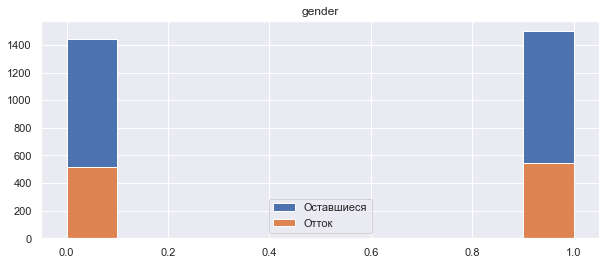

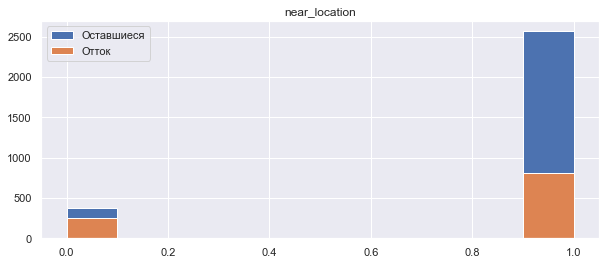

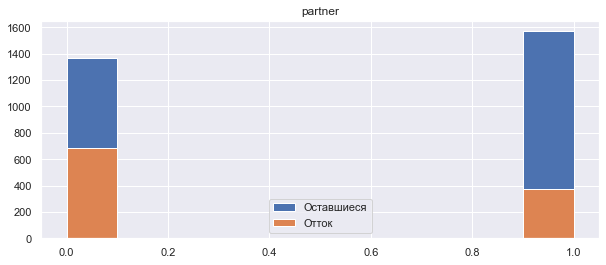

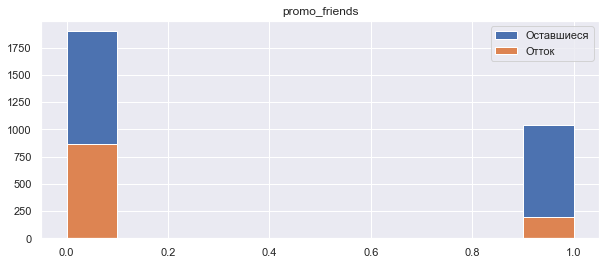

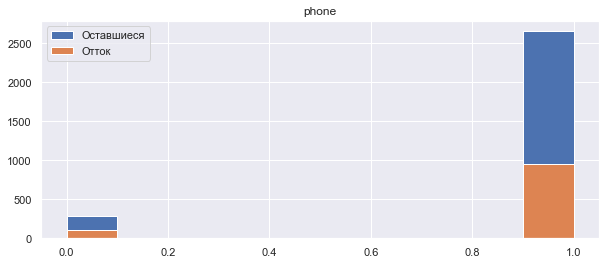

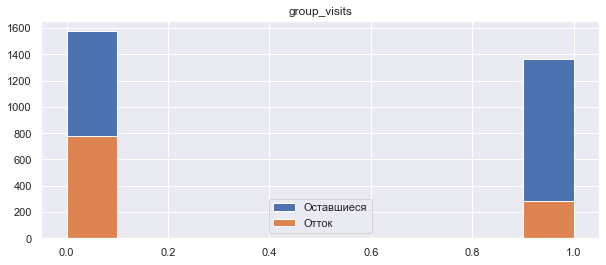

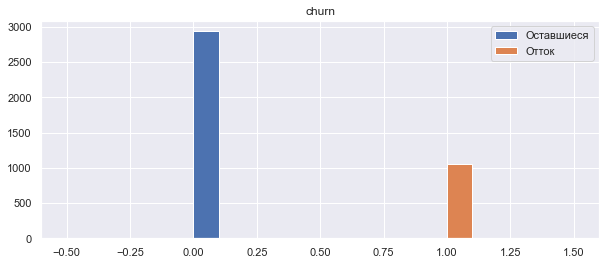

In [12]:
for column in df.columns:
    if column not in histplot_columns:
        plt.figure(figsize=(10, 4))
        df.groupby('churn')[column].hist()
        plt.title(column)
        plt.legend(['Оставшиеся', 'Отток'])
        plt.show()

Комментарий

- мужчин и женщин примерно поровну среди оставшихся и ушедших в отток
- если проживание клиента или работа рядом с фитнесом, вероятность оттока меньше
- клиенты сотрудники организаций -партнеров клуба оттекают реже
- вместе заниматься веселее, вероятно поэтому клиенты, пришедшие по акции "приведи друга" оттекают реже
- наличие мобильного телефона для связи оказывает совсем небольшое влияние на вероятность оттока клиента
- если клиент посещает групповые занятия, он останется с большей вероятностью


 - Построим heatmap по матрице корреляций

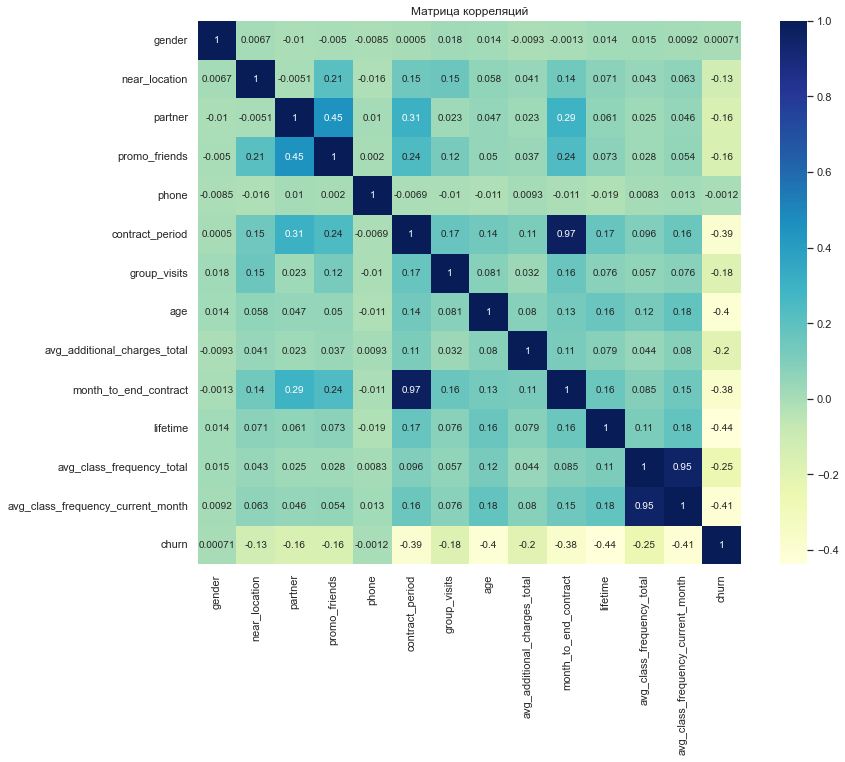

In [13]:
plt.figure(figsize=(14,10))
sns.heatmap(data = df.corr(), annot=True, square=True, cmap='YlGnBu')
plt.title('Матрица корреляций')
plt.show()

Комментарий

Судя по матрице корреляций нет признаков, которые оказывали бы на целевую переменную решающее влияние.

Признаки - `month_to_end_contract` и `contract_period`, а также `avg_class_frequency_current_month` и `avg_class_frequency_total` сильно коррелируют, так как являются близкими показателями.

## Построение модели прогнозирования оттока клиентов

In [14]:
# определим функцию, которая будет выводить  метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    
# разделим данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('churn', axis=1)
y = df['churn'] 

# разделим модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(3200, 13)
(800, 13)


In [15]:
# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]
# выведем все метрики
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:')

# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# обучим модель
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]
# выведем все метрики
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса:')
    

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


Комментарий:

- 92% доля верно угаданных ответов из всех прогнозов для обеих моделей

Модель логистической регрессии показала себя немного лучше:

 - в метрике `precision` доля правильных ответов среди целевого класса на 1% больше 
 - в метрике `recall` модель регрессии лучше укажет (на 2%), что клиент оттечет (полезно, чтобы быстрее принять меры по удержанию)
 

## Кластеризация клиентов

Проведем кластеризацию пользователей без столбца целевого назначения

 - Стандартизируем данные
 - Построим матрицу расстояний функцией linkage() на стандартизированной матрице признаков и нарисуем дендрограмму
 - Предположим какое количество кластеров можем выделить
 - Обучим модель кластеризации на основании алгоритма KMeans (число кластеров = 5)

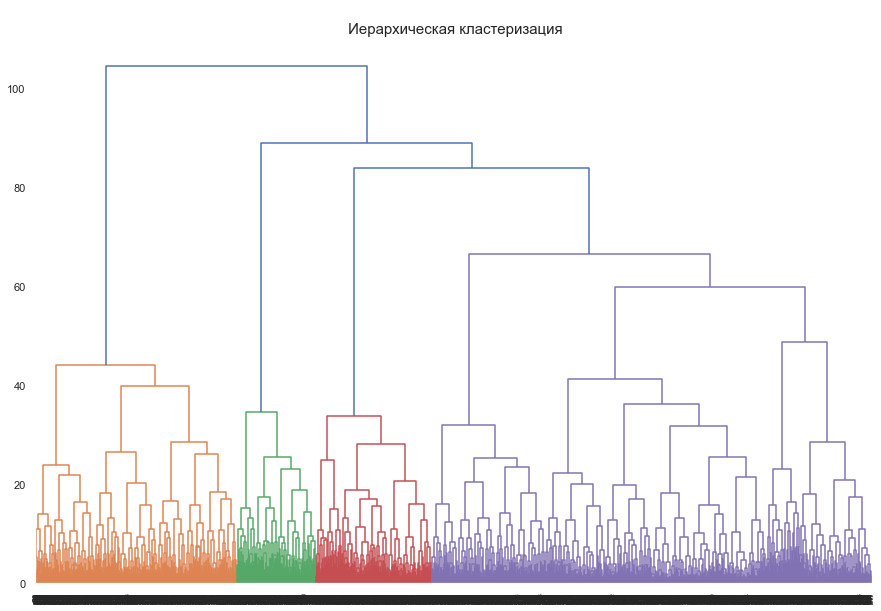

In [16]:
X_st = scaler.fit_transform(X)
linked = linkage(X_st, method='ward')

plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('\n Иерархическая кластеризация', fontsize=15)
plt.show()


Комментарий:

Очевидно, что выделяются 4 кластера. Будем использовать 5 по учебному заданию.

In [17]:
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(X_st)
df['cluster_km'] = labels

In [18]:
df['cluster_km'].value_counts()

3    1262
0    1010
4     838
2     505
1     385
Name: cluster_km, dtype: int64

In [19]:
df.groupby('cluster_km').mean().T.round(2)

cluster_km,0,1,2,3,4
gender,0.50,0.52,0.50,0.49,0.56
near_location,0.96,0.86,0.00,1.00,0.98
partner,0.78,0.47,0.46,0.35,0.36
promo_friends,0.57,0.31,0.08,0.24,0.23
phone,1.00,0.00,1.00,1.00,1.00
contract_period,10.89,4.79,2.35,1.95,2.67
group_visits,0.54,0.43,0.22,0.34,0.47
age,29.98,29.30,28.48,28.17,30.13
avg_additional_charges_total,160.76,143.96,135.46,131.62,161.66
month_to_end_contract,9.95,4.48,2.20,1.86,2.46


Комментарий:

Для кластеров характерны следующие черты
 - кластер 0 и кластер 4 самые надежные. Общие признаки для них 
   - самая низкая доля оттока 3% и 7% соответственно
   - клиент живет или работает рядом в 96% и 98 % случаев
   - средний возраст клиентов 30 лет
   - одинаково много тратят на дополнительные услуги
   - почти половина клиентов посещают групповые занятия
   - самый высокий лайфтайм около 5 месяцев
 - отличительные признаки  
   - для кластера 4 характерно более высокая частота посещений в неделю 3 раза - для кластера 0 - 2 раза
   - 78%  клиентов сотрудники компаний партнеров клуба в кластере 0 - только 36% в кластере 4
   - 57% клиентов пришли по акции "приведи друга"  в кластере 0  - 23% в кластере 4
   - почти все абонементы куплены на год в кластере 0 - в среднем на 2,7 месяцев в кластере 4 и соответственно отличается время до конца абонемента
   
 - кластер 3 самый многочисленный и у него самая большая доля оттока - 52% 
   - отличительные черты проживают или работают рядом с фитнес-центром 100% случаев
   - самый низкий лайфтайм 2,4 месяца и частота посещения в среднем - одно занятие в неделю
   - самые низкие траты на дополнительные услуги фитнес-клуба
   - длительность абонемента около 2 месяцев
 - кластер 2 второй по величине оттока - 44%
   - клиенты не живут рядом с фитнес-клубом
   - пришли по акции "приведи друга" только в 8% случаев
   - сотрудники компаний-партнеров фитнес-клуба в 46% 
   - посещают групповые занятия только в 22%
   - средняя частота посещений 1-2 раза в неделю
   - средняя длительность абонемента около 2 месяцев
   - средний возраст до 30 лет
   
 - в кластере 1 -  доля оттока 27%
   - клиенты кластера проживают или работают рядом с фитнес-клубом в 86 %
   - в 47% сотрудники компаний партнеров фитнес-клуба
   - пришли по акции "приведи друга " в 30 %
   - длительность абонемента в среднем 5 месяцев
   - посещают групповые занятия в 43%
   - средний лайфтайм около 4 месяцев
   

- Построим распределение признаков для кластеров

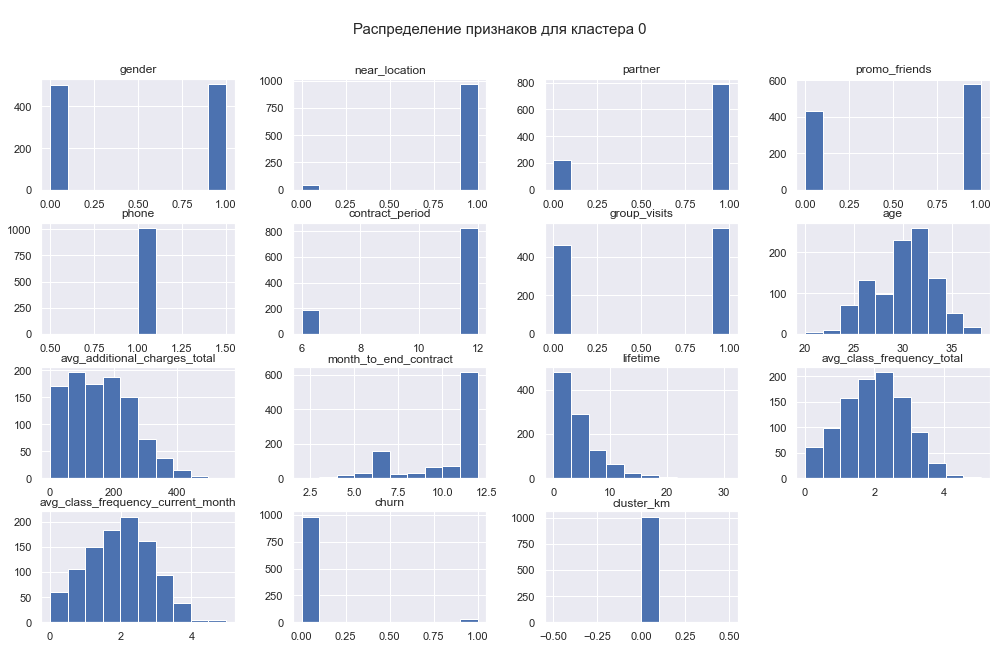

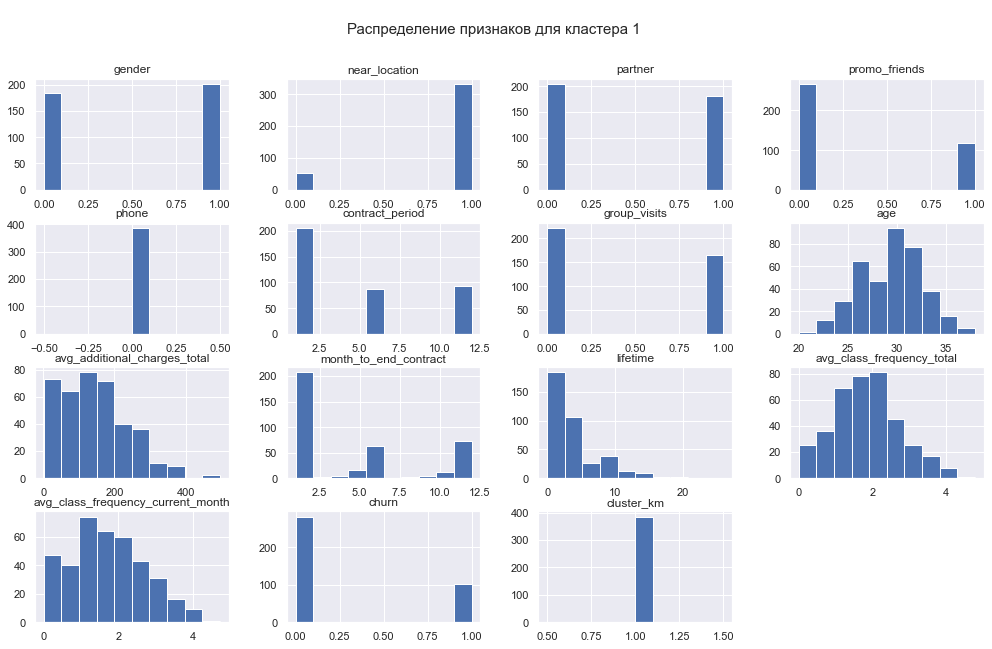

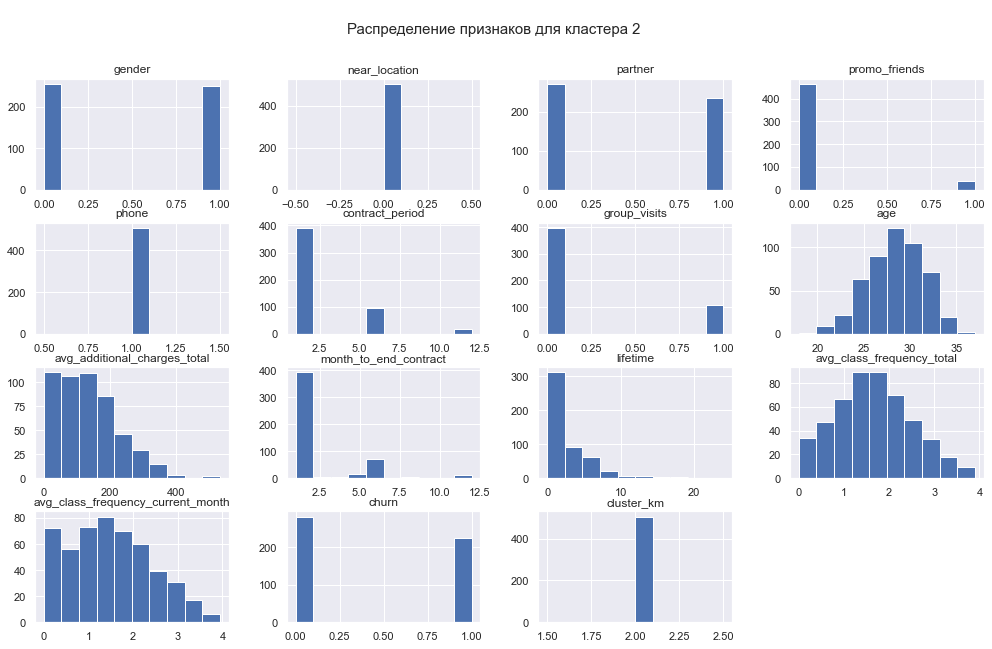

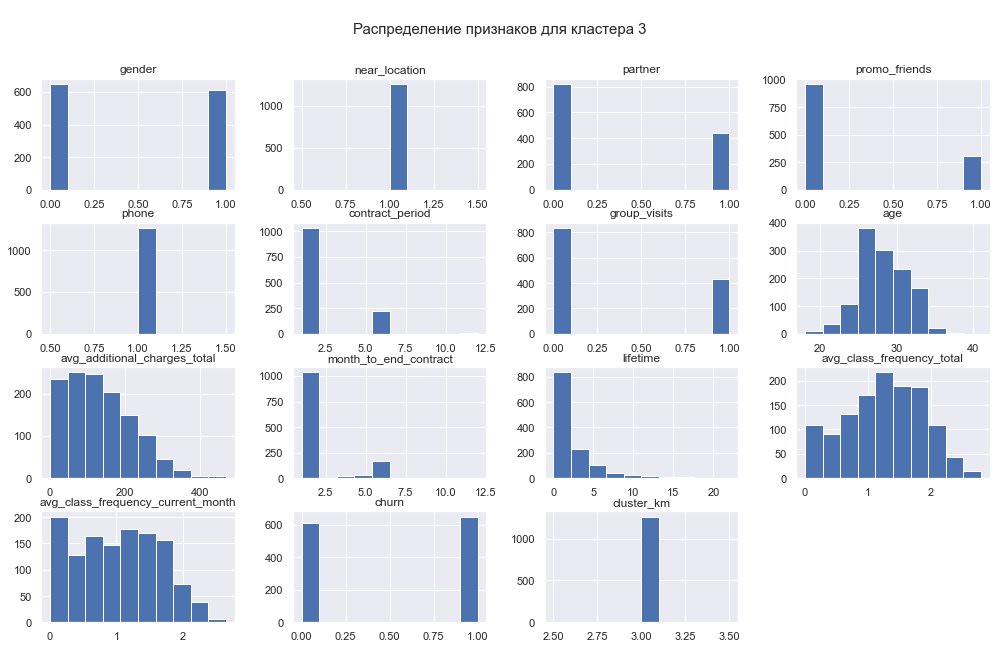

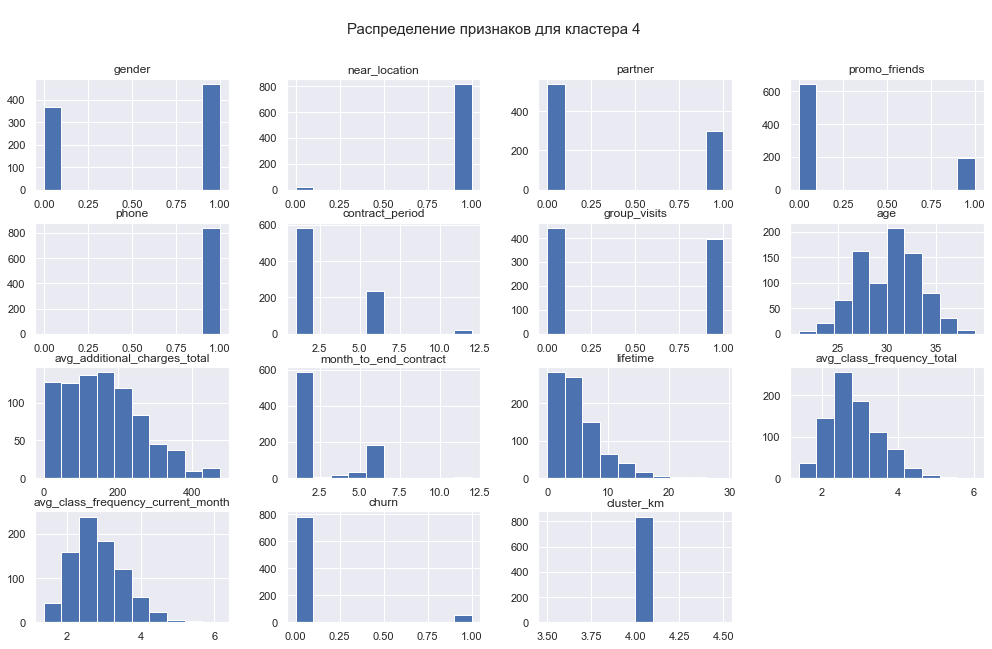

In [20]:
for value in [0, 1, 2, 3, 4]:
    df[df['cluster_km']==value].hist(figsize=(17,10))
    plt.suptitle('\nРаспределение признаков для кластера {}'.format(value), fontsize = 15)
    plt.show()

Комментарий:

 - для кластеров с низким  оттоком в распределениях признаков заметно следующее:
 
   - живут или работают рядом с фитнес-клубом
   - сотрудники компаний партнеров фитнес-клуба
   - посещают гупповые занятия
   - средний возраст 30 лет и больше
   - число посещений в неделю 2или 3 раза
   - тратятся на дополнительные услуги фитнес-клуба
   - длительность абонемента в среднем от 6 до 12 месяцев
   
 - для кластеров с большой долей оттока
 
   - короткий абонементский период
   - средний возраст до 30 лет
   - проживают не рядом с фитнесом, а также не сотрудники компаний партнеов и пришли не по акции "приведи друга"
   

## Вывод

Задачей данного исследования было провести анализ оттока в сети фитнес-центра и подготовить рекомендации по по удержанию клиентов. 

Отдел по работе с клиентами фитнес-центра перевел в электронный вид множество клиентских анкет и предоставил сведения в csv-файлах.

Информация на месяц до оттока и факт оттока на определенный месяц.

Данные предоставлены в корректоном виде - без пропусков и дубликатов.

*На этапе исследовательского анализа данных(EDA)*
 - изучили средние значения признаков в целом
 - изучили средние значения по группам  - тех, кто ушел в отток и, кто остался
 - построили распределения признаков
 
 
*Получили следующие результаты:* 
   - мужчин и женщин примерно поровну среди оставшихся и ушедших в отток
   - если проживание клиента или работа рядом с фитнесом, вероятность оттока меньше
   - клиенты сотрудники организаций - партнеров клуба оттекают реже
   - вместе заниматься веселее, вероятно поэтому клиенты, пришедшие по акции "приведи друга" меньше попадают в отток
   - наличие мобильного телефона для связи оказывает совсем небольшое влияние на вероятность оттока клиента
   - если клиент посещает групповые занятия, он останется с большей вероятностью
   - если клиент много тратит на дополнительные услуги фитнес-центра, он оттекает реже
   - средняя частота посещений в неделю - 2 раза - у оставшихся клиентов
   - лайфтайм у оставшихся клиентов логично больше
   - возрастная категория 30+ более стабильна в посещениях спортзала, чем 20+
   - оставшиеся клиенты чаще покупают абонемент на 6 или 12 месяцев
   - у оттекших клиентов минимальный срок до конци абонемента или абонемент закончился
   
*Построили модель прогнозирования оттока клиентов. Теперь можно прогнозировать вероятность оттока по каждому клиенту.*

*По матрице корреляции явных зависимостей факта оттока от одного конкретного признака не обнаружено*

Обучили модель кластеризации и спрогнозировали кластеры клиентов. Получили два кластера с низким показателем оттока - **3% и 7%**,
два  с высоким уровнем оттока - **50% и 44%**, и один кластер с показателем - **27%** отока

*Проанализировали средние показатели признаков, построили гистограммы распределения признаков по каждому кластеру.*

Выявили следующие характеристики для кластеров:

 - Большинство клиентов живет или работает рядом с фитнес-центром
 - Кластер 0
    - отток 3% - самый низкий
    - живут или работают недалеко от фитнес-центра
    - преобладают сотрудники компаний-партнеров - 78%
    - покупают абонемент на 12 месяцев
    - чаще всех посещают групповые занятия - 54%
    - чаще всех пришли по промоакции "приведи друга" - 57%
 - Кластер 1
   - отток - 27%
   - живут или работают рядом с фитнесом
   - нет мобильного телефона
   - средний абонемент 4,7 месяцев
 - Кластер 2
   - отток - 44% 
   - живут далеко от фитнес-центра
   - самый низкий процент 7% - пришли по промоакции
   - реже всех посещают групповые занятия
   - средний возраст 20+
 - Кластер 3 
   - отток самый большой - 51%
   - живут или работают рядом с фитнес-центром
   - самый короткий период абонемента в среднем 2 месяца
   - самое мешьее число посещений в неделю 1 раз
   - средний возраст 20+
 - Кластер 4
    - отток - 7%
    - живут или работают рядом с фитнесом
    - чаще всех посещают фитнес-центр - в среднем 3 раза в неделю
    - больше всех тратят на дополнительные услуги фитнес-клуба
    - средняя продолжительность абонемента 2,7 месяцев
    - средний возраст 30+
   
**Рекомендации:**

 - поддерживать и мотивировать "хорошие кластеры"
 - проводить активную рекламу клуба в районе его расположения
 - протестировать клиентов кластеров с высоким показателем оттока, выяснить предпочтения клиентов, скорректировать услуги с учетом пожеланий
 - использовать возможность предсказания вероятного оттока клиента и сфокусироваться на работе с ними, предпринимая опережающие действия
